In [1]:
import planar2 as pl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define iterables
nedges = np.arange(3, 11, 1, dtype='int') # Number of edges, first axis
nelem = len(nedges)
thetas = (nedges-2)*180 / nedges # Interior angles for regular polygons
# Initial angle of the polygon pose (wrt horizontal axis in counterclockwise direction)
initangles = 90 - thetas/2
initangles[::2] /= 2

r1 = 32
r2max = r1 * np.sin(np.radians(thetas/2))
r2min = 8
# Change of inner radius, second axis
r2 = {str(nedges[i]): np.linspace(r2max[i], r2min, 8, endpoint=True) for i in range(nelem)}

In [3]:
r2

{'10': array([30.43380852, 27.22897873, 24.02414894, 20.81931916, 17.61448937,
        14.40965958, 11.20482979,  8.        ]),
 '3': array([16.        , 14.85714286, 13.71428571, 12.57142857, 11.42857143,
        10.28571429,  9.14285714,  8.        ]),
 '4': array([22.627417, 20.537786, 18.448155, 16.358524, 14.268893, 12.179262,
        10.089631,  8.      ]),
 '5': array([25.88854382, 23.33303756, 20.7775313 , 18.22202504, 15.66651878,
        13.11101252, 10.55550626,  8.        ]),
 '6': array([27.71281292, 24.89669679, 22.08058066, 19.26446453, 16.44834839,
        13.63223226, 10.81611613,  8.        ]),
 '7': array([28.83100377, 25.85514609, 22.87928841, 19.90343073, 16.92757305,
        13.95171536, 10.97585768,  8.        ]),
 '8': array([29.56414504, 26.48355289, 23.40296074, 20.32236859, 17.24177645,
        14.1611843 , 11.08059215,  8.        ]),
 '9': array([30.07016387, 26.91728331, 23.76440276, 20.61152221, 17.45864166,
        14.3057611 , 11.15288055,  8.        ])}

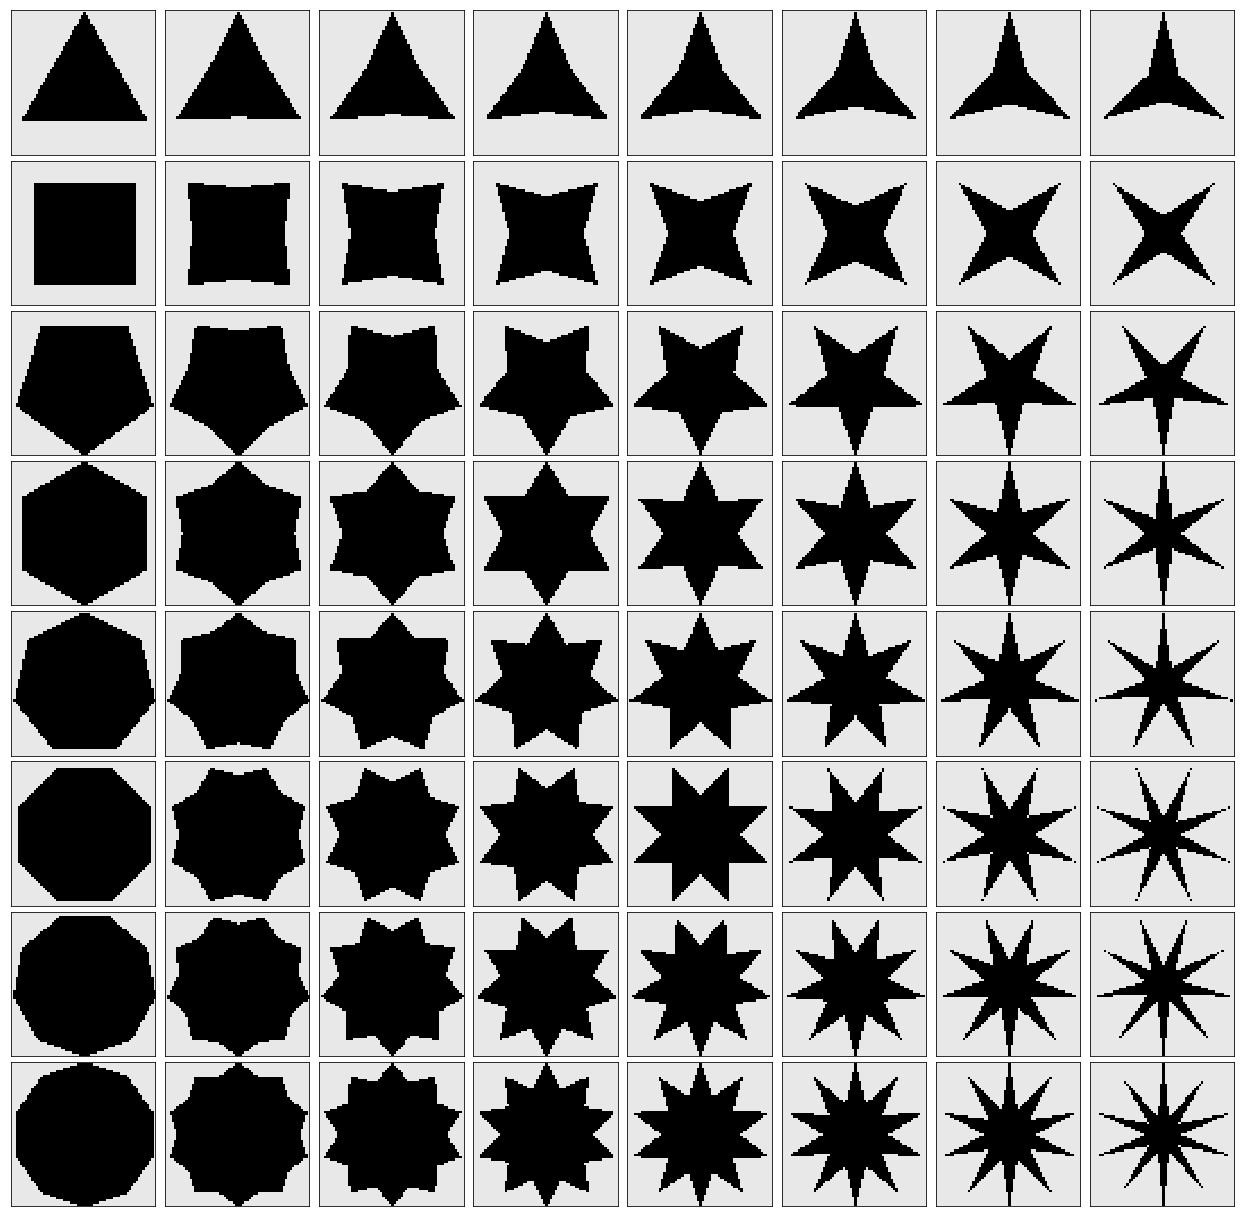

In [4]:
masks = []
f, axs = plt.subplots(8, 8, figsize=(22, 22))

for ieg, eg in enumerate(nedges):
    r2eg = r2[str(eg)]
    
    for ir, r2a in enumerate(r2eg):
        st = pl.mask.PolygonMask.star(eg, radius1=r1, radius2=r2a, angle=initangles[ieg], center=(16, 16))
        st.to_mask(fill='constant', fillfunc=1)
        masks.append(st.mask)
        
        axs[ieg, ir].imshow(st.mask, cmap='Greys', vmin=-0.2)
        axs[ieg, ir].set_xticks([])
        axs[ieg, ir].set_yticks([])
        
plt.subplots_adjust(wspace=0.04, hspace=0.04)
plt.savefig('./star_polygon_space.png', dpi=300, bbox_inches='tight', transparent=True)